In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [181]:
pip install plotly

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
   -- ------------------------------------- 1.0/19.1 MB 1.8 MB/s eta 0:00:11
   ---- ----------------------------------- 2.1/19.1 MB 2.7 MB/s eta 0:00:07
   ------ --------------------------------- 2.9/19.1 MB 3.1 MB/s eta 0:00:06
   ------ --------------------------------- 3.1/19.1 MB 3.1 MB/s eta 0:00:06
   --------- ------------------------------ 4.5/19.1 MB 3.3 MB/s eta 0:00:05
   --------- ------------------------------ 4.7/19.1 MB 2.9 MB/s eta 0:00:05
   ------------- -------------------------- 6.3/19.1 MB 3.5 MB/s eta 0:00:04
   ------------- -------------------------- 6.6/19.1 MB 3.5 MB/s eta 0:00:04
   --------------- -------

## importing necessary packages

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import plotly.express as px



In [149]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [116]:
df = pd.read_csv('F:\Git and github\Project\stackoverflow_full.csv')

In [117]:
df.head()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0


In [118]:
df = df.drop(columns='Unnamed: 0', axis=1)

In [119]:
df.shape

(73462, 14)

In [120]:
df.isnull().sum()

Age                0
Accessibility      0
EdLevel            0
Employment         0
Gender             0
MentalHealth       0
MainBranch         0
YearsCode          0
YearsCodePro       0
Country            0
PreviousSalary     0
HaveWorkedWith    63
ComputerSkills     0
Employed           0
dtype: int64

In [121]:
df.dtypes

Age                object
Accessibility      object
EdLevel            object
Employment          int64
Gender             object
MentalHealth       object
MainBranch         object
YearsCode           int64
YearsCodePro        int64
Country            object
PreviousSalary    float64
HaveWorkedWith     object
ComputerSkills      int64
Employed            int64
dtype: object

In [122]:
df = df.fillna(method='ffill')

In [123]:
df['EdLevel'].unique()

array(['Master', 'Undergraduate', 'PhD', 'Other', 'NoHigherEd'],
      dtype=object)

In [124]:
df['MentalHealth'].unique()

array(['No', 'Yes'], dtype=object)

In [125]:
df['Gender'].unique()

array(['Man', 'Woman', 'NonBinary'], dtype=object)

In [126]:
df['Country'].unique()

array(['Sweden', 'Spain', 'Germany', 'Canada', 'Singapore', 'France',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'Turkey',
       'United States of America', 'Brazil', 'Bulgaria', 'Greece',
       'Italy', 'Netherlands', 'Poland', 'Hungary', 'Pakistan', 'Nigeria',
       'Albania', 'Bangladesh', 'Viet Nam', 'Romania', 'Sri Lanka',
       'India', 'Lithuania', 'Ukraine', 'Croatia', 'Georgia', 'Denmark',
       'Ireland', 'Lebanon', 'Bahrain', 'Egypt', 'Colombia', 'Australia',
       'Chile', 'Indonesia', 'Iran, Islamic Republic of...', 'Portugal',
       'Slovakia', 'Armenia', 'Finland', 'Hong Kong (S.A.R.)',
       'Argentina', 'Costa Rica', 'Peru', 'Japan', 'Belgium',
       'United Arab Emirates', 'Bolivia', 'Austria', 'South Africa',
       'Norway', 'Serbia', 'Malta', 'Malaysia', 'Czech Republic',
       'Belarus', 'Madagascar', 'Kenya', 'Slovenia', 'Uruguay',
       'The former Yugoslav Republic of Ma

## Exploratory Data Analysis

In [127]:
df['HaveWorkedWith'].unique()

array(['C++;Python;Git;PostgreSQL',
       'Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;TypeScript;Git;Express;React.js;Vue.js;AWS;PostgreSQL',
       'C;C++;Java;Perl;Ruby;Git;Ruby on Rails', ...,
       'C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;AWS;DigitalOcean;Managed Hosting;MySQL;PostgreSQL',
       'HTML/CSS;JavaScript;TypeScript;Docker;Express;Node.js;React.js;AWS;Firebase;Heroku;MongoDB;PostgreSQL',
       'C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn;Angular;ASP.NET;jQuery;React.js;AWS;DynamoDB;Microsoft SQL Server;SQLite'],
      dtype=object)

C:\Users\Dell\AppData\Local\Temp\ipykernel_20772\96934822.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 45)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20772\96934822.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 45)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20772\96934822.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 45)
C:\Users\Dell\AppData\Local\Temp\ipykernel_20772\96934822.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(a

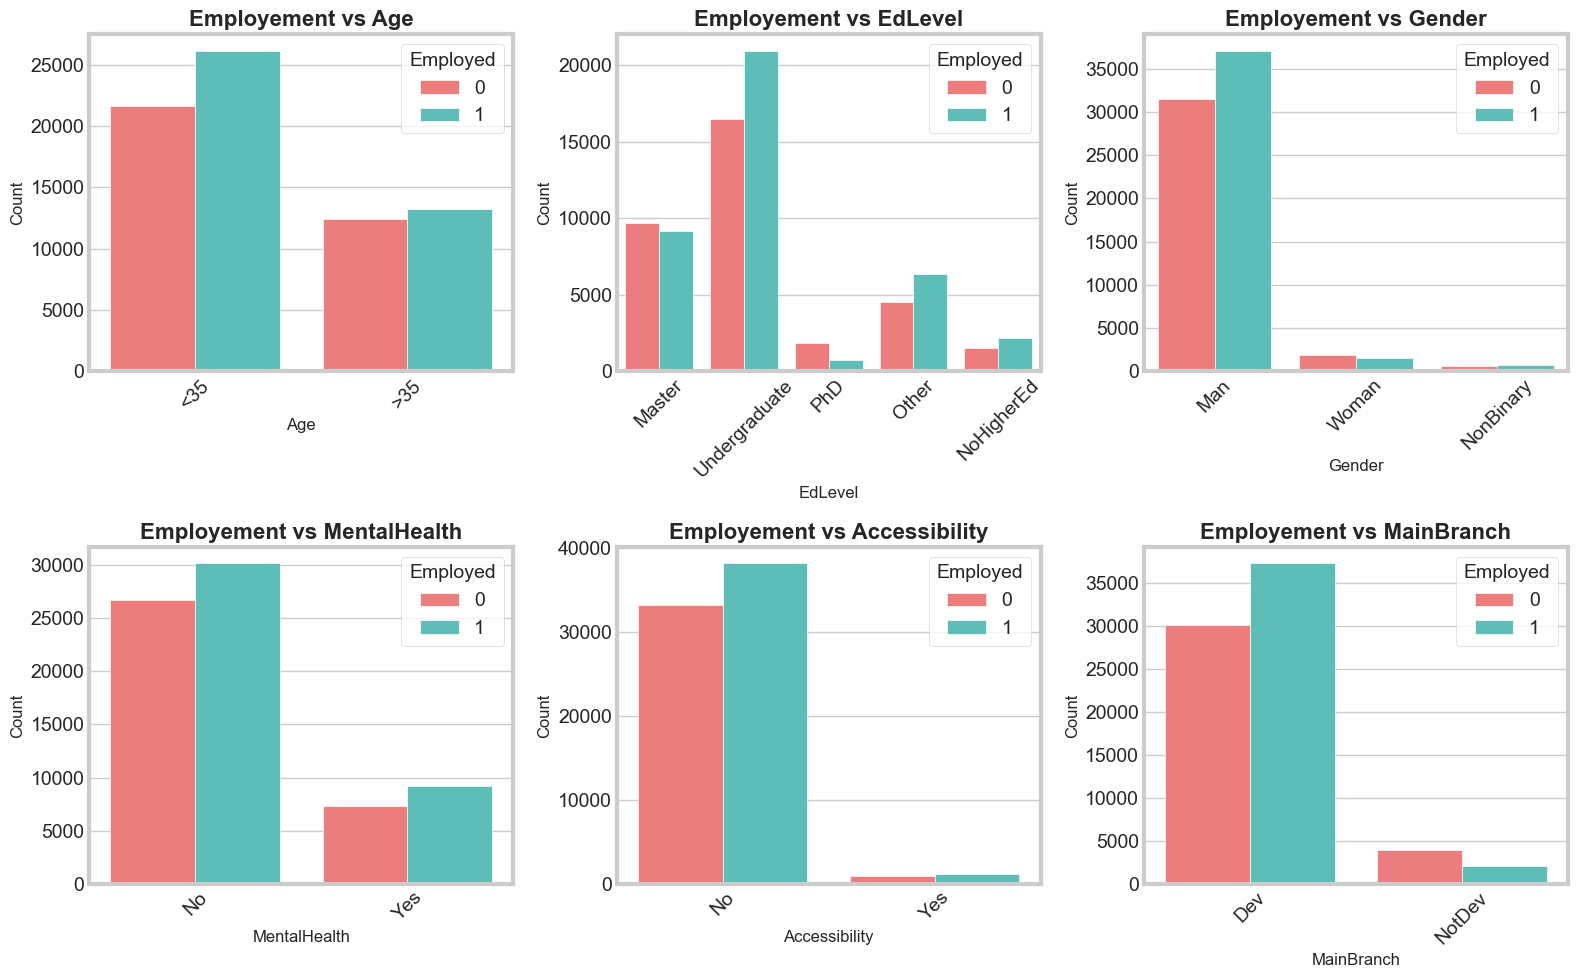

In [150]:
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')
colors = ['#FF6B6B', '#4ECDC4']

columns_to_plot = ['Age', 'EdLevel', 'Gender','MentalHealth', 'Accessibility','MainBranch']
ncols =3
numplot = len(columns_to_plot)


n_rows = math.ceil(numplot/ncols)

fig , axes = plt.subplots(nrows = n_rows,ncols = ncols , figsize=(16,n_rows*5))
axes = axes.flatten()
for i, col in enumerate(columns_to_plot):
    
    sns.countplot(x= col, hue = 'Employed', data = df,  ax=axes[i], palette = colors)
    
    axes[i].set_title(f'Employement vs {col}', fontsize = 16, fontweight = 'bold')
    axes[i].set_xlabel(f'{col}', fontsize = 12)
    axes[i].set_ylabel('Count', fontsize = 12)
    axes[i].set_xticklabels(axes[i].get_xticklabels(),rotation = 45)
    
plt.tight_layout()

plt.show()


### Key take aways from this plot

1. People under 35 are more employed than those above 35 year age <br>
2. People with mental health issues have low employment<br>
3. Man has dominance in employement <br>
4. Development branch has got an upper hand in employment<br>
5. Under graduate have more employment rate

In [129]:
df['Skills'] = df['HaveWorkedWith'].str.split(';')

encoded_skills = df['Skills'].str.join('|').str.get_dummies()

concat_df = pd.concat([df['Employed'], encoded_skills], axis=1)

concat_df = concat_df.groupby('Employed').mean().T

concat_df['EmploymentRate'] = concat_df[1]/(concat_df[1]+concat_df[0])

top_skills = concat_df['EmploymentRate'].sort_values(ascending = False)

top_skills.head()




Fastify     0.943685
Next.js     0.850077
Node.js     0.849680
ASP.NET     0.846848
Solidity    0.841046
Name: EmploymentRate, dtype: float64

In [130]:
top_skills = top_skills.reset_index()



In [131]:
top_skills = top_skills.rename(columns={'index':'Skills'})

In [132]:
top_skills.head()

,Skills,EmploymentRate
0,Fastify,0.943685
1,Next.js,0.850077
2,Node.js,0.849680
3,ASP.NET,0.846848
4,Solidity,0.841046


## Top 20 skillset or programming languages with highest employment rate

C:\Users\Dell\AppData\Local\Temp\ipykernel_20772\3534003320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Skills', y = 'EmploymentRate', data = top_20_skills, palette = 'viridis'  )


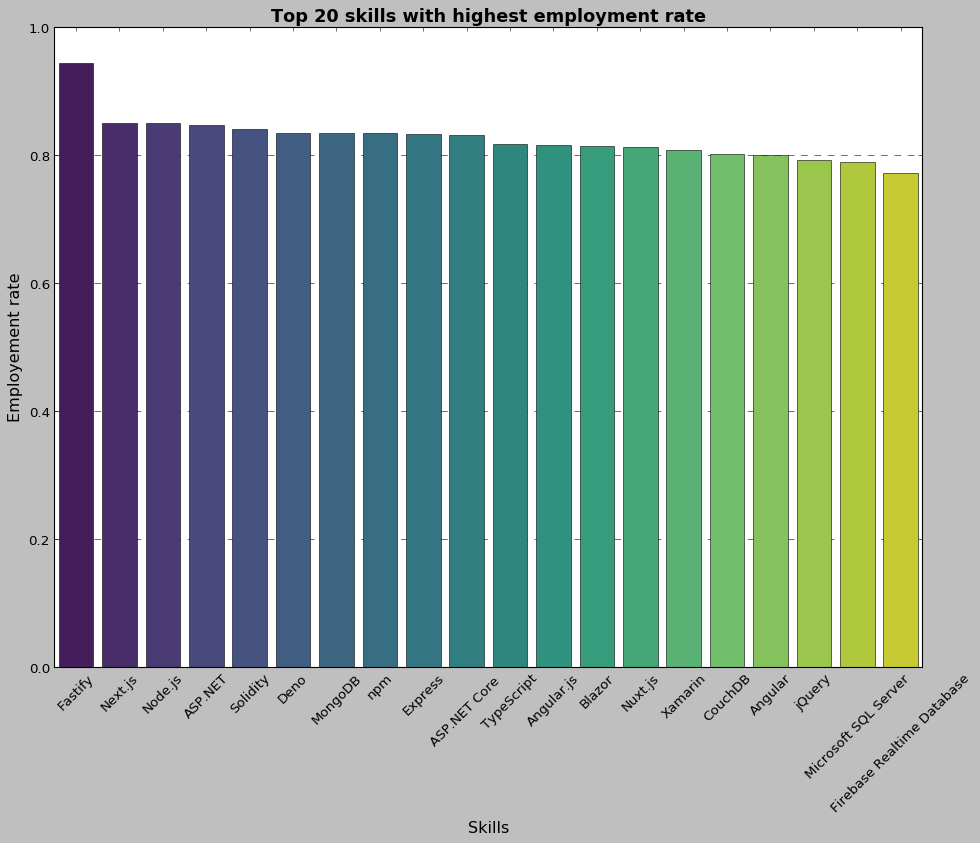

In [171]:
top_20_skills = top_skills.head(20)
plt.figure(figsize=(14, 10))

sns.barplot(x = 'Skills', y = 'EmploymentRate', data = top_20_skills, palette = 'viridis'  )

plt.title('Top 20 skills with highest employment rate', fontsize = 16, fontweight = 'bold')
plt.xlabel('Skills')
plt.ylabel('Employement rate')
plt.xticks(rotation = 45)
plt.show()



In [156]:
df['Country'].unique()

array(['Sweden', 'Spain', 'Germany', 'Canada', 'Singapore', 'France',
       'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Russian Federation', 'Israel', 'Turkey',
       'United States of America', 'Brazil', 'Bulgaria', 'Greece',
       'Italy', 'Netherlands', 'Poland', 'Hungary', 'Pakistan', 'Nigeria',
       'Albania', 'Bangladesh', 'Viet Nam', 'Romania', 'Sri Lanka',
       'India', 'Lithuania', 'Ukraine', 'Croatia', 'Georgia', 'Denmark',
       'Ireland', 'Lebanon', 'Bahrain', 'Egypt', 'Colombia', 'Australia',
       'Chile', 'Indonesia', 'Iran, Islamic Republic of...', 'Portugal',
       'Slovakia', 'Armenia', 'Finland', 'Hong Kong (S.A.R.)',
       'Argentina', 'Costa Rica', 'Peru', 'Japan', 'Belgium',
       'United Arab Emirates', 'Bolivia', 'Austria', 'South Africa',
       'Norway', 'Serbia', 'Malta', 'Malaysia', 'Czech Republic',
       'Belarus', 'Madagascar', 'Kenya', 'Slovenia', 'Uruguay',
       'The former Yugoslav Republic of Ma

In [157]:
country_abbrev = {
    "United States of America" : 'USA',
    "United Kingdom of Great Britain and Northern Ireland" : 'UK',
    "United Arab Emirates" : 'UAE',
    ''
}

df['Short_countries'] = df['Country'].map(country_abbrev).fillna(df['Country'])

## Top ten countries with higest employemnet rate

In [162]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


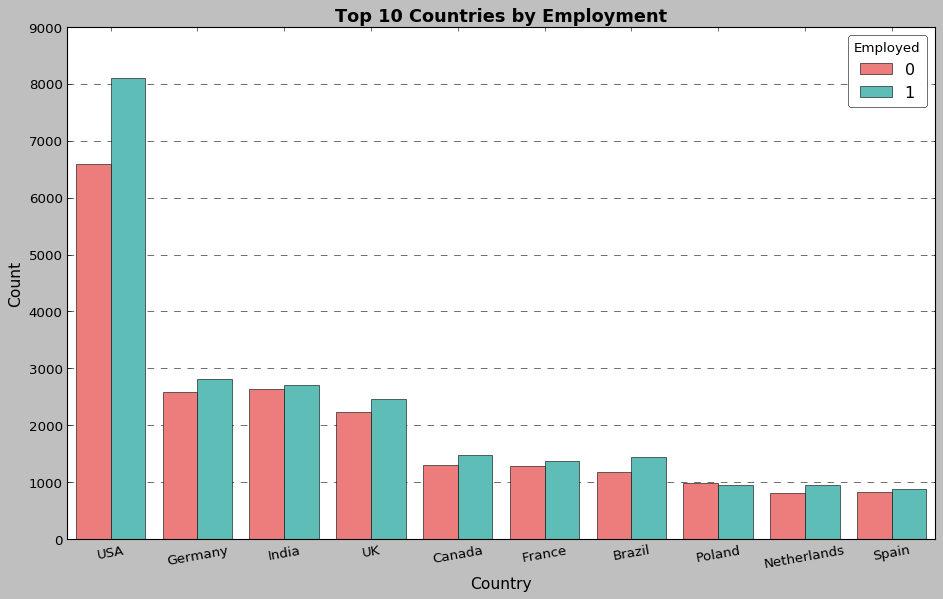

In [169]:
# Get the top 10 countries by count
plt.style.use('grayscale')
top_10_countries = df['Short_countries'].value_counts().nlargest(10).index

# Filter rows where the country is one of the top 10 countries
df_top_10 = df[df['Short_countries'].isin(top_10_countries)]

# Plot the result
plt.figure(figsize=(14, 8))
sns.countplot(x='Short_countries', data=df_top_10, order=top_10_countries, hue = 'Employed', palette = colors)

plt.xticks(rotation = 10)
plt.xlabel('Country', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.title('Top 10 Countries by Employment', fontsize = 16, fontweight = 'bold') 
plt.show()


USA is the country with highest no in employement

## Average computer skills of employer vs non employer

In [178]:
df_av_cs = df.groupby('Employed')['ComputerSkills'].mean()
df_av_cs

Employed
0     8.984502
1    17.271578
Name: ComputerSkills, dtype: float64

## Previous average salary of employement vs non employment

In [180]:
df_avg_sal = df.groupby('Employed')['PreviousSalary'].mean()
df_avg_sal

Employed
0    67730.073584
1    67767.720299
Name: PreviousSalary, dtype: float64

In [185]:
def segment_country(country):
    if country in ['Bangladesh', 'India', 'Pakistan', 'Sri Lanka', 'Nepal', 'Maldives']:
        return 'South Asia'
    elif country in ['Sweden', 'Spain', 'Germany', 'France', 'Switzerland', 'United Kingdom of Great Britain and Northern Ireland','Russian Federation', 'Bulgaria', 'Greece', 'Italy', 'Netherlands', 'Poland', 'Hungary', 'Romania','Lithuania', 'Ukraine', 'Croatia', 'Georgia', 'Denmark', 'Ireland', 'Portugal', 'Slovakia', 'Finland','Austria', 'Norway', 'Serbia', 'Malta', 'Czech Republic', 'Belarus', 'Slovenia', 'The former Yugoslav Republic of Macedonia', 'Armenia', 'Estonia', 'Latvia', 'Luxembourg', 'Iceland', 'Cyprus']:
        return 'Euope'
    elif country in ['Canada', 'United States of America', 'Mexico', 'Costa Rica', 'Dominican Republic', 'Guatemala','Saint Lucia', 'Saint Vincent and the Grenadines', 'Suriname']:
         return 'North America'
    elif country in ['Brazil', 'Chile', 'Argentina', 'Colombia', 'Bolivia', 'Peru', 'Uruguay','Venezuela, Bolivarian Republic of...', 'Ecuador']:
        return 'latin_america'
    elif country in ['Turkey', 'Israel', 'Lebanon', 'Bahrain', 'Egypt', 'United Arab Emirates', 'Algeria', 'Jordan', 'Tunisia','Syrian Arab Republic', 'Qatar', 'Djibouti']:
        return 'Middle East & North Africa (MENA)'
    elif country in ['Nigeria', 'Kenya', 'Madagascar', 'Zambia', 'South Africa', 'Botswana', 'Gambia', 'Burkina Faso', 'Seychelles', 'Malawi', 'Somalia', 'Niger', 'Liberia', 'Burundi', 'Mauritania', 'Mali', 'Democratic Republic of the Congo']:
        return 'Sub-Saharan Africa'
    elif country in ['Singapore', 'Viet Nam', 'Indonesia', 'Malaysia', 'Hong Kong (S.A.R.)', 'Japan', 'South Korea', 'Philippines', 'Taiwan', 'China', 'Mongolia', 'Timor-Leste', 'Fiji', 'Kazakhstan', 'Uzbekistan', "Lao People's Democratic Republic", 'Australia']:
        return 'East Asia and Pacific'
    else:
        return 'Other'


In [186]:
df['region'] = df['Country'].apply(segment_country)

<Axes: xlabel='region'>

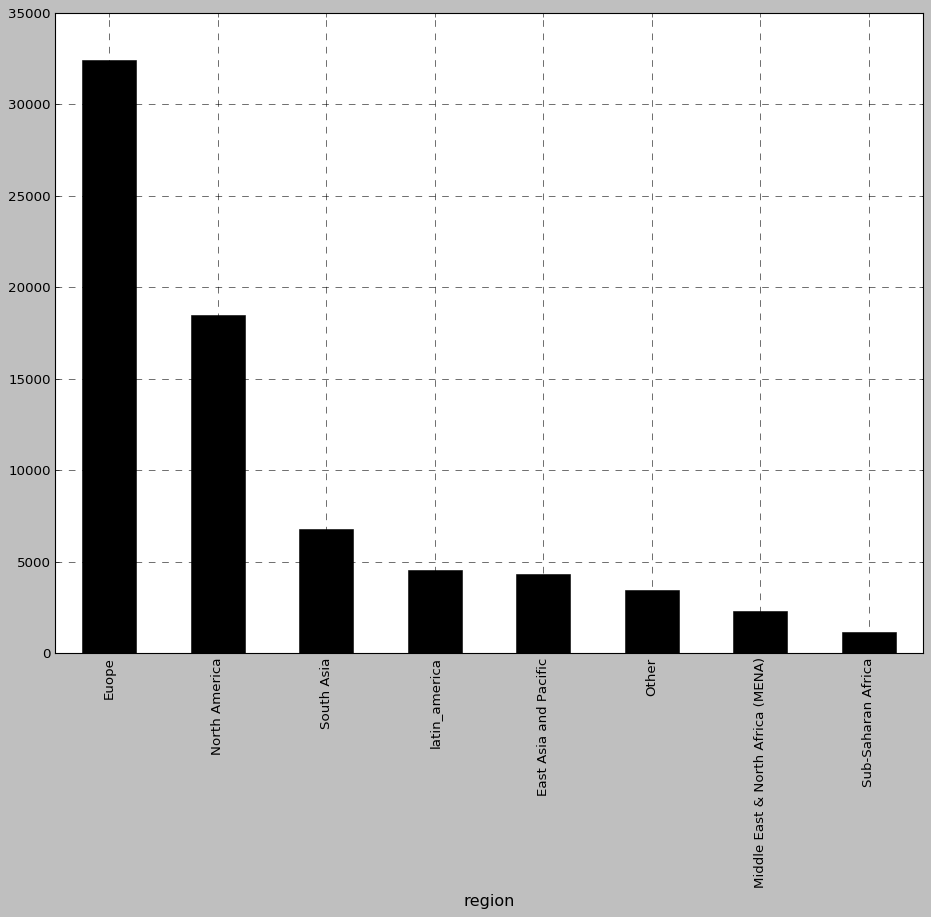

In [188]:
plt.figure(figsize=(14,10))
df['region'].value_counts().plot(kind='bar')

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


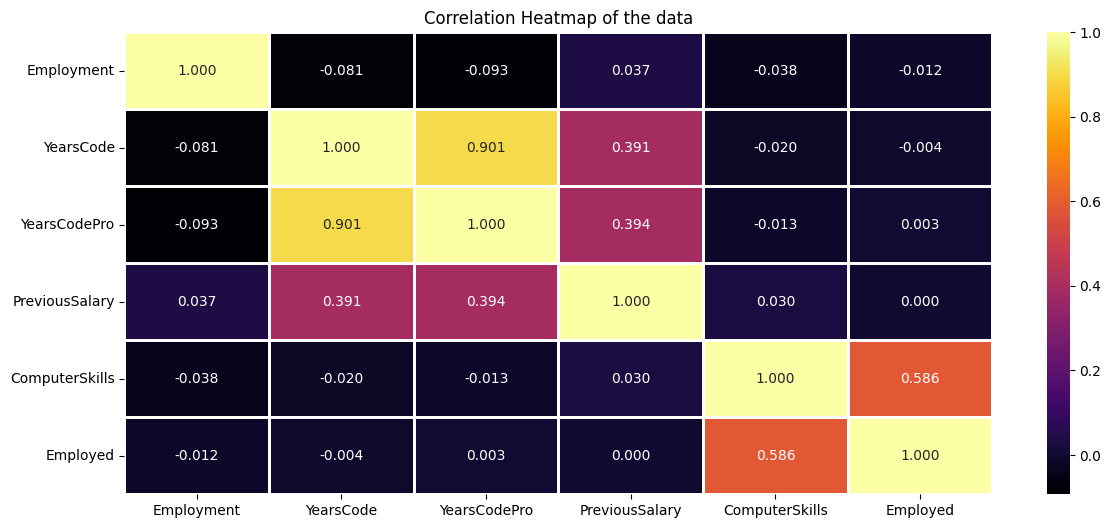

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(14,6))
sns.heatmap(correlation_matrix, cmap='inferno', annot=True, fmt='.3f', linewidth=1)
plt.title('Correlation Heatmap of the data')
plt.show()


In [ ]:
column_list = ['EdLevel','MentalHealth','Gender','MainBranch','Country','Age','Accessibility','HaveWorkedWith']

In [ ]:
label_encoder = LabelEncoder()
for column in column_list:
    if column in df.columns and df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

## Standard Scale Selection in large values

In [ ]:
scaler = StandardScaler()
df[['PreviousSalary','HaveWorkedWith']] = scaler.fit_transform(df[['PreviousSalary','HaveWorkedWith']])

In [ ]:
X = df.drop(columns=['Employed'], axis=1)
y = df['Employed']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('x_train', x_train.shape)
print('y_train', y_train.shape)
print('x_test', x_test.shape)
print('ytest', y_test.shape)

x_train (58769, 13)
y_train (58769,)
x_test (14693, 13)
ytest (14693,)


# Decision Tree classifier

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      6826
           1       0.80      0.80      0.80      7867

    accuracy                           0.79     14693
   macro avg       0.79      0.79      0.79     14693
weighted avg       0.79      0.79      0.79     14693



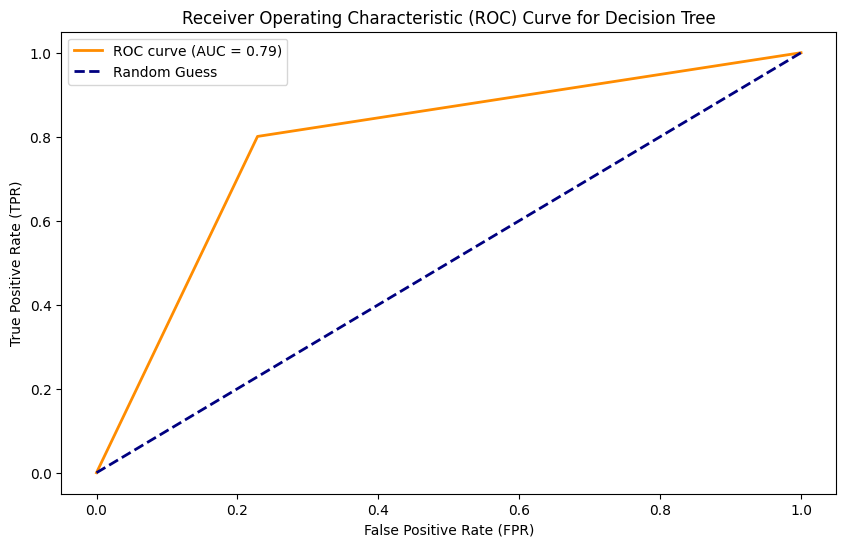

In [ ]:
y_scores = model.predict_proba(x_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree')
plt.legend()
plt.show()

# Accuracy Without HyperParameter Tuning and feature engineering

In [ ]:
print('accuracy',accuracy)

accuracy 0.7871095079289457


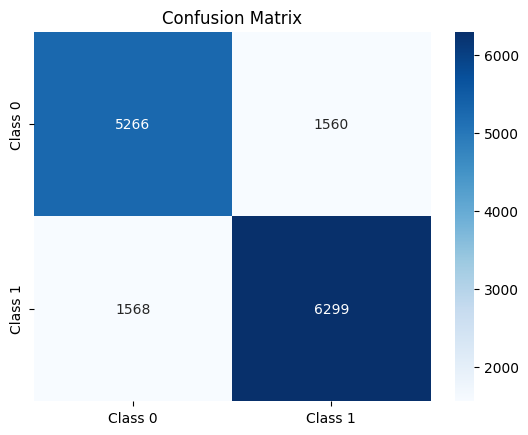

In [ ]:
# Plot the confusion matrix using matplotlib and seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.show()


# Features Importance in predictions in Decision tree

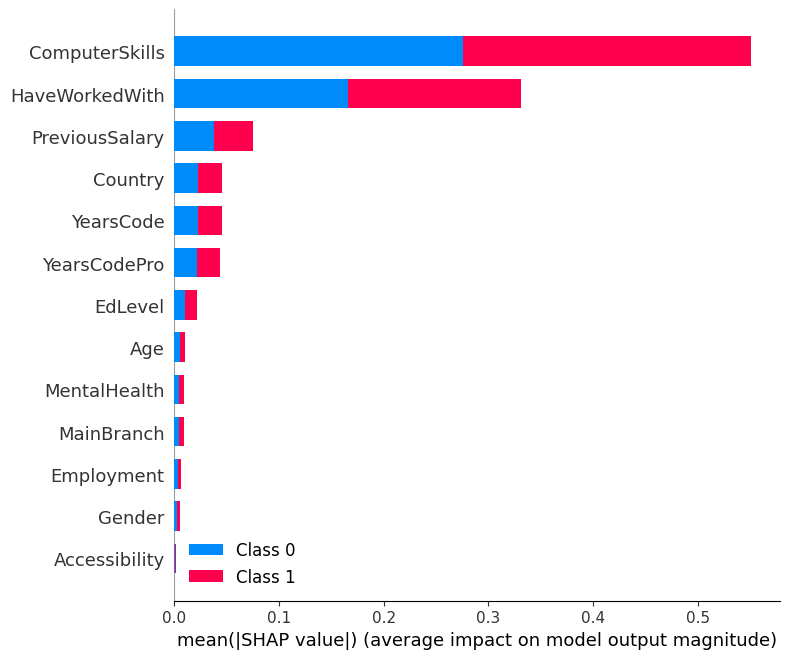

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)

## Implementation of GridSearchCV

In [ ]:
param_grid = {
    'max_depth' :    [3,4,5,6,7,8],
    'min_samples_split': [2,3,4],
    'min_samples_leaf' : [1,2,3,4],
    'random_state' : [0,42]
}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)
bestparame = grid_search.best_params_
print('Best parameter', bestparame)

Best parameter {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'random_state': 42}


In [ ]:
dtree = DecisionTreeClassifier(max_depth=8, min_samples_leaf=3,min_samples_split=2,random_state=42)
dtree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=3, random_state=42)

In [ ]:

y_pred = dtree.predict(x_test)
print('Accuracy :', accuracy_score(y_test, y_pred))

Accuracy : 0.8214115565235146


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Precision: 0.8364
Recall: 0.8285
F1-score: 0.8324


## Gradient Boosting Algorithm for improving the accuracy of algorithm

In [ ]:
gb_classifier = GradientBoostingClassifier(**bestparame)
gb_classifier.fit(x_train, y_train)
y_pred = gb_classifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)



Accuracy on Test Set: 0.8523106241067174


In [ ]:
confu_matrix = confusion_matrix(y_test, y_pred)

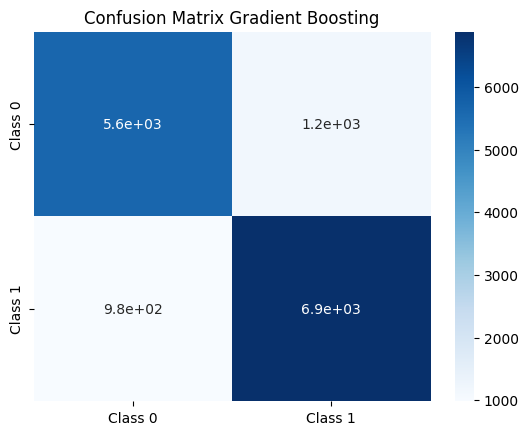

In [ ]:
sns.heatmap(confu_matrix, annot = True, cmap = 'Blues',xticklabels=['Class 0','Class 1'],yticklabels=['Class 0','Class 1']  )
plt.title('Confusion Matrix Gradient Boosting')
plt.show()

## Random Forest Classifier for improving accuracy

In [ ]:
r_classifier = RandomForestClassifier(n_estimators=10, oob_score=True, random_state=42)
r_classifier.fit(x_train, y_train)

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.


RandomForestClassifier(n_estimators=10, oob_score=True, random_state=42)

In [ ]:
predictions = r_classifier.predict(x_test)

In [ ]:
acc_score = accuracy_score(y_test, predictions)
print('accuracy', acc_score)

accuracy 0.8070509766555503


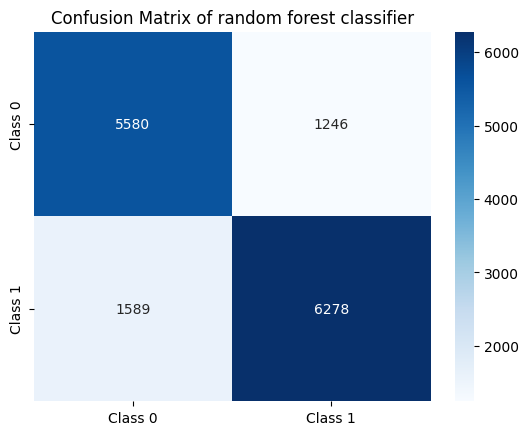

In [ ]:
# Plot the confusion matrix using matplotlib and seaborn
confusion_matrix_random = confusion_matrix(y_test,predictions)
sns.heatmap(confusion_matrix_random, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix of random forest classifier')
plt.show()


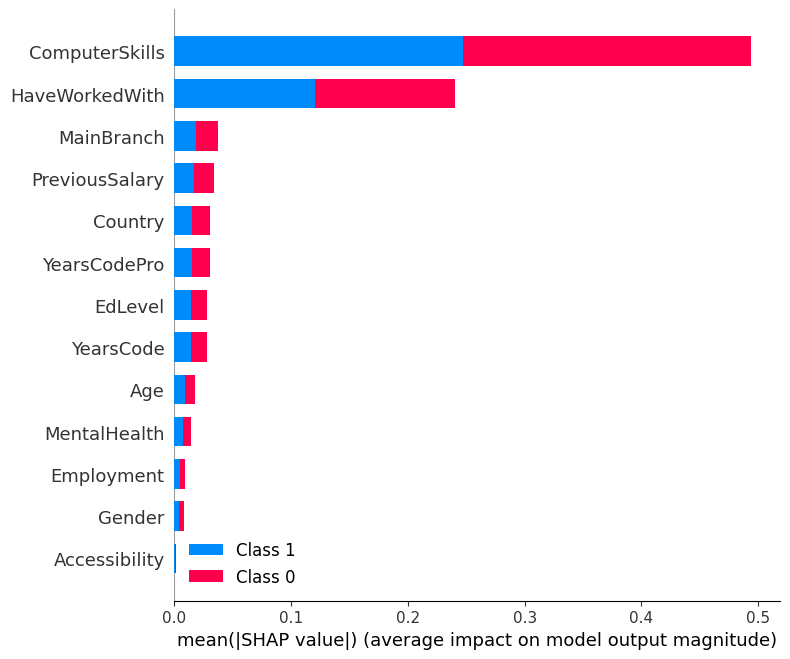

In [ ]:
explainer = shap.TreeExplainer(r_classifier)
shap_values = explainer.shap_values(shap.sample(x_test))  # Adjust the number as needed
shap.summary_plot(shap_values, x_test)

# Hyper Parameter tuning of Random Classifier Using RandomSearchCV

In [ ]:
param_grid = {
    'n_estimators' : [10, 30, 90],
    'criterion' :      ['gini','entropy'],
    'min_samples_split' : [2,4,8],
    'min_samples_leaf' : [1,2,3],
    'max_depth'       :  [1,2,3,4,5,8],
    'max_features'    :  ['auto','sqrt','log2'],
    'bootstrap'        :  [True,False]
}
random_search = RandomizedSearchCV(r_classifier, param_distributions=param_grid, n_iter=10, cv=5, scoring = 'accuracy')
random_search.fit(x_train, y_train)
bestParam = random_search.best_params_
print('Best Parameters:', bestParam)

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTr

Best Parameters: {'n_estimators': 90, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 'auto', 'max_depth': 8, 'criterion': 'gini', 'bootstrap': True}


## Accuracy After the Hyper Parameter Tuning

In [ ]:
r_classifier = RandomForestClassifier(n_estimators=90, oob_score=True,min_samples_split = 8,min_samples_leaf=1,max_features='log2', max_depth = 8,criterion = 'gini',bootstrap = True, random_state=42)
r_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, max_features='log2', min_samples_split=8,
                       n_estimators=90, oob_score=True, random_state=42)

In [ ]:
y_pred = r_classifier.predict(x_test)
print('Accuracy :', accuracy_score(y_test, y_pred))

Accuracy : 0.8138569386782821


In [ ]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Precision: 0.8089
Recall: 0.8542
F1-score: 0.8309


## SVM  Model Application

In [ ]:
model = SVC()
model.fit(x_train,y_train)

SVC()

In [ ]:
predict_svm = model.predict(x_test)
print('Accuracy :',accuracy_score(y_test, predict_svm))

Accuracy : 0.6585448853195399


## Naive Bayes Algorithm

In [ ]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)

GaussianNB()

In [ ]:
predict_NB = NB_model.predict(x_test)
print('Accuracy :', accuracy_score(y_test,predict_NB))

Accuracy : 0.7764241475532566


# Logistic Regression

In [ ]:
Logistic_model = LogisticRegression()

Logistic_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
logistic_predict = Logistic_model.predict(x_test)
print('Accuracy :',accuracy_score(y_test, logistic_predict))

Accuracy : 0.7756074321105288


## Hyper Parameter Tuning

In [ ]:
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs', 'saga']
}
Gsearch = GridSearchCV(Logistic_model, param_grid, cv = 5 )
Gsearch